<a href="https://colab.research.google.com/github/roniel06/python_ml_exc/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Excercice
### Author: Roniel Polanco
Based in Fuse Machines Resources

## 0. Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 1. Gather the Data

In [2]:
from sklearn import datasets

In [8]:
iris_ds = datasets.load_iris()
X,y = iris_ds.data, iris_ds.target
class_names = iris_ds.target_names

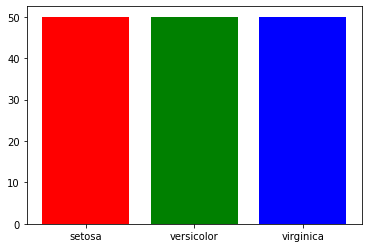

In [10]:
_, count_elements = np.unique(y, return_counts=True)
plt.bar(class_names, count_elements, color=['r','g','b'])
plt.show()

## 2. Split The Data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

## 3. Training

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In [14]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [16]:
y_pred = tree_clf.predict(X_test)
print("Predicted Label {}, \nTrue label = {}".format(y_pred[:10], y_test[:10]))

Predicted Label [0 2 1 1 0 1 0 0 2 1], 
True label = [0 2 1 1 0 1 0 0 2 1]


## 4. Metrics Checking 

In [17]:
from sklearn.metrics import accuracy_score


In [18]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9333333333333333


In [19]:
from sklearn.metrics import  plot_confusion_matrix

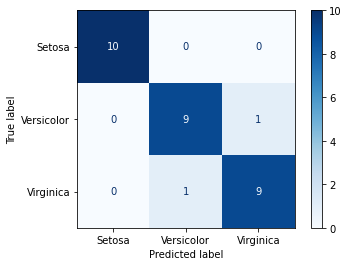

In [21]:
classes = ['Setosa', 'Versicolor', 'Virginica']
disp = plot_confusion_matrix(tree_clf, X_test, y_test, display_labels=classes, cmap='Blues')
plt.show()

## 5. Tree Ploting SkLearn

In [22]:
from sklearn.tree import plot_tree


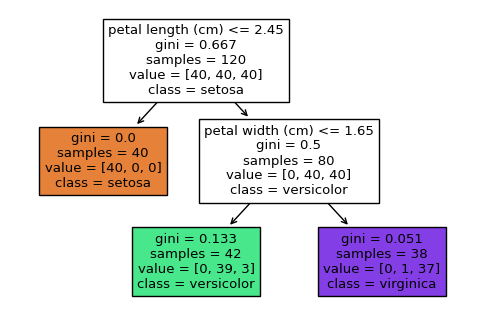

In [23]:
plt.figure(dpi=100)
_ = plot_tree(tree_clf, feature_names=iris_ds.feature_names, class_names=iris_ds.target_names, filled=True)

## 6. Classification Plotting

In [24]:
from matplotlib.colors import ListedColormap


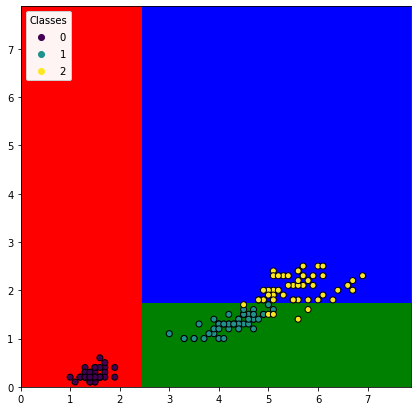

In [32]:
plot_step = 0.02
fig, axes = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)

colors = ListedColormap(['r','g','b'])

X = iris_ds.data[:,[2,3]]
y = iris_ds.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42).fit(X,y)

#Decision surface

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,0].min() - 1, X[:,0].max() + 1

xx, yy =np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min,y_max, plot_step))

##Predictions
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Decision boundary plot ends
cs = plt.contourf(xx, yy,Z, cmap=colors)
scatter  = axes.scatter(X[:,0], X[:,1], c=y, edgecolor='black')

legend = axes.legend(*scatter.legend_elements(), loc='upper left', title='Classes')
axes.add_artist(legend)
